# Curve Fitter

This tutorial demonstrates how to do curve fitting as a pre-processing step to iGFA.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.insert(0, '/home/cabsel/gfa/')
from gfapy.curve_fit import curve_fitter

In [3]:
mainDir = '/home/cabsel/gfa/'
inputDir = os.path.join(mainDir, 'inputfiles')

Here, we demo how to ingest and smooth the VCD experimental data with a logistic function.

## Ingest data into Curve Fitter

In [4]:
expt_data = pd.read_excel(os.path.join(inputDir, 'smoothed_data_lowpH.xlsx'), sheet_name=['vcd', 'titer', 'frac', 'q_prod_matched'])
expt_data['VCD'] = (expt_data.pop('vcd').rename(columns={'VCD_1e6cells_mL': 'VCD (1E6 VC/mL)',
                                                         'Time_days': 'Time (WD)',
                                                         'fit_VCD_1e6cells_mL': 'fit_VCD (1E6 VC/mL)'}).
                    set_index('Time (WD)'))
display(expt_data['VCD'].reset_index().columns)

Index(['Time (WD)', 'VCD (1E6 VC/mL)', 'fit_VCD (1E6 VC/mL)'], dtype='object')

In [5]:
fit_vcd = curve_fitter()
fit_vcd.ingest_data(expt_data['VCD'].reset_index(), x_col='Time (WD)')

Choose a model from below keys or "Custom:"
['Polynomial', 'Exponential', 'Power', 'Logarithmic', 'Fourier', 'Gaussian', 'Weibull', 'Hill-type', 'Sigmoidal']


Here, the logistic function is of the form: 
<b>A / (exp(B * x) + C * exp(-D * x)) </b> where A, B, C and D are estimated parameters.

In [9]:
vcd_col = 'VCD (1E6 VC/mL)'
fit_vcd.fit_jupyter(vcd_col)

Output()

<Axes: xlabel='Time (WD)', ylabel='VCD (1E6 VC/mL)'>

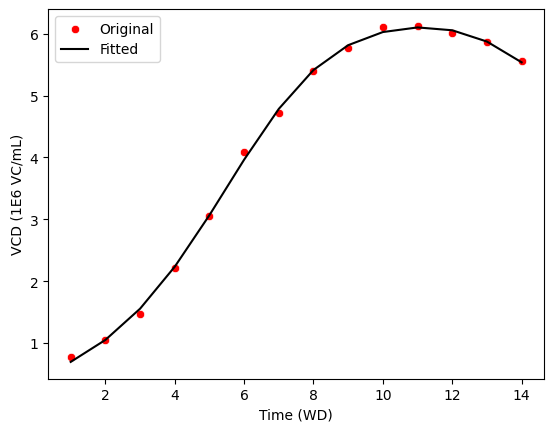

In [12]:
ax = sns.scatterplot(data=fit_vcd.data, x='Time (WD)', y='VCD (1E6 VC/mL)', c='r', label='Original')
sns.lineplot(data=fit_vcd.data, x='Time (WD)', y='fit_VCD (1E6 VC/mL)', c='k', ax=ax, label='Fitted')